In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# load PWT
df = pd.read_csv("cleaned_V11.csv")

# filter out only rgdpo for the Netherlands
df_nl = df[df['country'] == 'Netherlands']


mlr_x = df_nl[['year', 'emp', 'hc']]
mlr_y = df_nl['rgdpo']


c:\Users\storm\OneDrive - Hogeschool Rotterdam\Jaar 4 PC\Project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


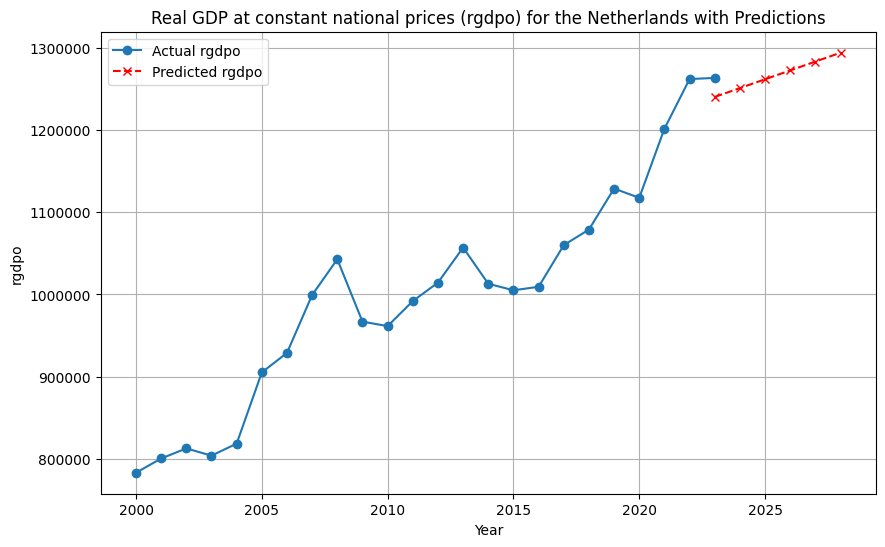

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    mlr_x,
    mlr_y,
    test_size=0.2,
    random_state=42)

model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# predict 2023 to 2028, assuming emp and hc keep their 2023 YOY growth / shrink rate
emp_2019 = df_nl[df_nl['year'] == 2023]['emp'].values[0]
hc_2019 = df_nl[df_nl['year'] == 2023]['hc'].values[0]
future_years = np.array([[year, emp_2019, hc_2019] for year in range(2023, 2029)])
future_predictions = model.predict(future_years)



# plot predictions, only from 2000 onwards for clarity
df_nl = df_nl[df_nl['year'] >= 2000]
plt.figure(figsize=(10,6))
plt.plot(df_nl['year'], df_nl['rgdpo'], marker='o', label='Actual rgdpo')
plt.plot(future_years[:, 0], future_predictions, marker='x', linestyle='--', color='red', label='Predicted rgdpo')
plt.title('Real GDP at constant national prices (rgdpo) for the Netherlands with Predictions')
plt.xlabel('Year')
plt.ylabel('rgdpo')
# get rid of 1e6 notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# calculate and print R^2 score and root mean squared error
r2_score = sklearn.metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print(f'R^2 Score: {r2_score}')
print(f'Root Mean Squared Error: {rmse}')

R^2 Score: 0.9758894491988017
Root Mean Squared Error: 58892.97068610449
